https://github.com/jupyter/notebook/issues/2287

incase you run into an issue with running the code due to exceeding run rate (?)

In [1]:
# imports for database connection
import math
import pandas as pd
import sqlalchemy
import statistics 
from statistics import mean
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine, func

# import these to view table column headers & rows
from sqlalchemy.orm import sessionmaker
from sqlalchemy import select

# Import the dependencies for analysis
%matplotlib inline

import numpy as np
from scipy import stats
from scipy.stats import linregress
import pandas as pd
import datetime as dt
from datetime import date
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt

In [2]:
# UPDATE PATH ONCE FINAL ANALYSIS FILE IS COMPILED
engine = create_engine("sqlite:///../Resources/covid_db.db")

In [3]:
# reflect an existing database into a new model (creates base class for automap schema)
Base = automap_base()

In [4]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
Base.classes.keys()

['covid_stats', 'government_regulation']

In [6]:
# save references to each table
covid_stats = Base.classes.covid_stats
government_regulation = Base.classes.government_regulation

In [7]:
# Create session (link) from Python to the database
session = sessionmaker(bind=engine)()

In [8]:
# Merge covid_stats_table with government regulation_table
joined = session.query(covid_stats.primary_key_reaction,\
                        covid_stats.date_updated,\
                        covid_stats.iso_code,\
                        covid_stats.continent,\
                        covid_stats.location,\
                        covid_stats.population,\
                        covid_stats.population_density,\
                        covid_stats.median_age,\
                        covid_stats.new_cases,\
                        covid_stats.percentage_of_Pop_New_Cases,\
                        covid_stats.new_deaths,\
                        covid_stats.percentage_of_Pop_New_Deaths,\
                        covid_stats.new_tests,\
                        covid_stats.percentage_of_Pop_New_Tests,\
                        covid_stats.total_cases_updated,\
                        covid_stats.percentage_of_Pop_Total_Cases,\
                        covid_stats.total_deaths_updated,\
                        covid_stats.percentage_of_Pop_Total_Deaths,\
                        covid_stats.total_tests_updated,\
                        covid_stats.percentage_of_Pop_Total_Tests,\
                       government_regulation.primary_key_response,\
                       government_regulation.StringencyIndex_updated,\
                       government_regulation.percentage_change_stringency,\
                       government_regulation.StringencyLegacyIndex_updated,\
                       government_regulation.GovernmentResponseIndex_updated,\
                       government_regulation.percentage_change_GovernmentResponse,\
                       government_regulation.ContainmentHealthIndex_updated,\
                       government_regulation.percentage_change_ContainmentHealth,\
                       government_regulation.EconomicSupportIndex_updated,\
                       government_regulation.percentage_change_EconomicSupport)\
        .join(government_regulation,government_regulation.primary_key_response == covid_stats.primary_key_reaction)

# save the query results as a Pandas DataFrame and set the index
merged_covid_df = pd.DataFrame(joined, columns=['primary_key_reaction',
                                             'date_updated',
                                             'iso_code',
                                             'continent',
                                             'location',
                                             'population',
                                             'population_density',
                                             'median_age',
                                             'new_cases',
                                             'percentage_of_Pop_New_Cases',
                                             'new_deaths',
                                             'percentage_of_Pop_New_Deaths',
                                             'new_tests',
                                             'percentage_of_Pop_New_Tests',
                                             'total_cases_updated',
                                             'percentage_of_Pop_Total_Cases',
                                             'total_deaths_updated',
                                             'percentage_of_Pop_Total_Deaths',
                                             'total_tests_updated',
                                             'percentage_of_Pop_Total_Tests',
                                             'primary_key_response',
                                             'StringencyIndex_updated',
                                             'percentage_change_stringency',
                                             'StringencyLegacyIndex_updated',
                                             'GovernmentResponseIndex_updated',
                                             'percentage_change_GovernmentResponse',
                                             'ContainmentHealthIndex_updated',
                                             'percentage_change_ContainmentHealth',
                                             'EconomicSupportIndex_updated',
                                             'percentage_change_EconomicSupport'
                                             ])

In [9]:
# preview 
merged_covid_df

,primary_key_reaction,date_updated,iso_code,continent,location,population,population_density,median_age,new_cases,percentage_of_Pop_New_Cases,...,primary_key_response,StringencyIndex_updated,percentage_change_stringency,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,percentage_change_GovernmentResponse,ContainmentHealthIndex_updated,percentage_change_ContainmentHealth,EconomicSupportIndex_updated,percentage_change_EconomicSupport
0,ABW2020-03-13,2020-03-13,ABW,North America,Aruba,106766,584.800,41.2,2,0.001873,...,ABW2020-03-13,0.00,0.000000,0.00,2.56,0.000000,3.03,0.000000,0.0,0.0
1,ABW2020-03-19,2020-03-19,ABW,North America,Aruba,106766,584.800,41.2,0,0.000000,...,ABW2020-03-19,33.33,0.000000,42.86,29.49,15.015601,34.85,15.016502,0.0,0.0
2,ABW2020-03-20,2020-03-20,ABW,North America,Aruba,106766,584.800,41.2,2,0.001873,...,ABW2020-03-20,33.33,0.000000,42.86,29.49,0.000000,34.85,0.000000,0.0,0.0
3,ABW2020-03-21,2020-03-21,ABW,North America,Aruba,106766,584.800,41.2,0,0.000000,...,ABW2020-03-21,44.44,33.333333,60.71,37.18,26.076636,43.94,26.083214,0.0,0.0
4,ABW2020-03-22,2020-03-22,ABW,North America,Aruba,106766,584.800,41.2,0,0.000000,...,ABW2020-03-22,44.44,0.000000,60.71,37.18,0.000000,43.94,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32272,ZWE2020-08-27,2020-08-27,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,55,0.000370,...,ZWE2020-08-27,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0
32273,ZWE2020-08-28,2020-08-28,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,41,0.000276,...,ZWE2020-08-28,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0
32274,ZWE2020-08-29,2020-08-29,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,96,0.000646,...,ZWE2020-08-29,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0
32275,ZWE2020-08-30,2020-08-30,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,18,0.000121,...,ZWE2020-08-30,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0


# Record the "ramp up" of the stringency index for each country

In [10]:
countries = list(merged_covid_df['location'].unique())
print(countries)
len(countries)

['Aruba', 'Afghanistan', 'Angola', 'Albania', 'United Arab Emirates', 'Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana', 'Central African Republic', 'Canada', 'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Democratic Republic of Congo', 'Congo', 'Colombia', 'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia', 'Greece', 'Guatemala', 'Guam', 'Guyana', 'Hong Kong', 'Honduras', 'Croatia', 'Haiti', 'Hungary', 'Indonesia', 'India', 'Ireland', 'Iran', 'Iraq', 'Iceland', 'Israel', 'Italy', 'Jamaica', 'Jordan', 'Japan', 'Kazakhstan', 'Kenya', 'Kyrgyzstan

164

In [11]:
# Determine the average of total minimum values per country within the Stringency Index
min_list = []

for country in countries:
    countryLoc = merged_covid_df.loc[merged_covid_df['location'] == country]
    stringencyResp = countryLoc['StringencyIndex_updated']
    stringencyResp_min = stringencyResp.min(axis=0)
    min_list.append(stringencyResp_min)
    
print(min_list)

mean = mean(min_list)
mean

[0.0, 0.0, 11.11, 36.11, 0.0, 11.11, 0.0, 0.0, 0.0, 11.11, 0.0, 27.78, 0.0, 13.89, 21.3, 0.0, 11.11, 0.0, 54.63, 30.56, 0.0, 38.89, 19.44, 31.48, 47.22, 11.11, 0.0, 0.0, 0.0, 0.0, 11.11, 0.0, 11.11, 11.11, 12.04, 43.52, 11.11, 13.89, 22.22, 0.0, 0.0, 33.33, 0.0, 0.0, 0.0, 0.0, 0.0, 22.22, 0.0, 0.0, 2.78, 0.0, 11.11, 0.0, 33.33, 0.0, 0.0, 8.33, 13.89, 31.94, 0.0, 41.67, 49.07, 25.0, 41.67, 11.11, 0.0, 17.59, 11.11, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 30.56, 0.0, 0.0, 19.44, 13.89, 63.89, 0.0, 0.0, 0.0, 11.11, 0.0, 30.56, 87.96, 0.0, 54.63, 0.0, 0.0, 8.33, 0.0, 11.11, 59.26, 0.0, 47.22, 43.52, 49.07, 44.44, 16.67, 16.67, 50.0, 0.0, 8.33, 13.89, 0.0, 8.33, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.33, 0.0, 0.0, 22.22, 11.11, 60.19, 11.11, 5.56, 74.07, 0.0, 0.0, 0.0, 30.09, 11.11, 45.37, 0.0, 0.0, 32.41, 65.74, 8.33, 13.89, 33.33, 16.67, 11.11, 0.0, 19.44, 25.0, 27.78, 0.0, 0.0, 46.3, 13.89, 20.37, 0.0, 23.15, 22.22, 47.22, 11.11, 20.37, 0.0, 60.19, 51.85, 0.0, 31.48, 2.78, 16.67, 27.78]


15.147743902439025

In [12]:
# List of filtered countries for "ramp up" period
ramp_up = []

In [13]:
# Loop through all countries and capture ramp up period
for location in countries:
    country = merged_covid_df.loc[merged_covid_df['location'] == location]
   
    country = country.loc[(country.StringencyIndex_updated >= 15) &
                   (country.percentage_change_stringency > 0) &
                   (country.StringencyIndex_updated <= country["StringencyIndex_updated"].max())
                  ]
    
    country['date_updated'] = pd.to_datetime(country['date_updated'])
    country.reset_index(inplace=True)
    
    ramp_up_max = country.StringencyIndex_updated.max()
    ramp_up_end_date = country.loc[country.StringencyIndex_updated == ramp_up_max]
    ramp_up_end_date = ramp_up_end_date.drop_duplicates(subset=['StringencyIndex_updated'], keep='first')
    ramp_up_date = ramp_up_end_date['date_updated']
    index = ramp_up_date.index.values
    index = index.tolist()
    
    country.drop(country.index[np.where(country.index > index)[0]],inplace=True)
    
    ramp_up.append(country)
    
ramp_up_df = pd.DataFrame()

for df in ramp_up:
    ramp_up_df = ramp_up_df.append(df)

In [14]:
ramp_up_df.reset_index(inplace=True)
ramp_up_df.drop(['index'],axis=1,inplace=True)
ramp_up_df.drop(['level_0'],axis=1,inplace=True)

In [15]:
ramp_up_df

,primary_key_reaction,date_updated,iso_code,continent,location,population,population_density,median_age,new_cases,percentage_of_Pop_New_Cases,...,primary_key_response,StringencyIndex_updated,percentage_change_stringency,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,percentage_change_GovernmentResponse,ContainmentHealthIndex_updated,percentage_change_ContainmentHealth,EconomicSupportIndex_updated,percentage_change_EconomicSupport
0,ABW2020-03-21,2020-03-21,ABW,North America,Aruba,106766,584.800,41.2,0,0.000000,...,ABW2020-03-21,44.44,33.333333,60.71,37.18,26.076636,43.94,26.083214,0.0,0.0
1,ABW2020-03-29,2020-03-29,ABW,North America,Aruba,106766,584.800,41.2,0,0.000000,...,ABW2020-03-29,85.19,91.696670,85.71,65.38,75.847230,77.27,75.853437,0.0,0.0
2,ABW2020-04-10,2020-04-10,ABW,North America,Aruba,106766,584.800,41.2,5,0.004683,...,ABW2020-04-10,88.89,4.343233,85.71,81.41,3.246671,80.30,3.921315,87.5,0.0
3,AFG2020-03-01,2020-03-01,AFG,Asia,Afghanistan,38928341,54.422,18.6,0,0.000000,...,AFG2020-03-01,27.78,233.493397,34.52,25.64,110.509031,30.30,110.562891,0.0,0.0
4,AFG2020-03-14,2020-03-14,AFG,Asia,Afghanistan,38928341,54.422,18.6,0,0.000000,...,AFG2020-03-14,38.89,39.992801,48.81,33.33,29.992200,39.39,30.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,ZMB2020-05-02,2020-05-02,ZMB,Africa,Zambia,18383956,22.995,17.7,3,0.000016,...,ZMB2020-05-02,70.83,8.501838,70.95,63.14,6.493506,70.08,6.943385,25.0,0.0
948,ZWE2020-03-23,2020-03-23,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,0,0.000000,...,ZWE2020-03-23,45.37,63.318934,47.62,31.41,63.338534,37.12,63.308403,0.0,0.0
949,ZWE2020-03-24,2020-03-24,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,0,0.000000,...,ZWE2020-03-24,56.48,24.487547,61.90,42.95,36.739892,50.76,36.745690,0.0,0.0
950,ZWE2020-03-27,2020-03-27,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,0,0.000000,...,ZWE2020-03-27,62.04,9.844193,66.67,46.79,8.940629,55.30,8.944050,0.0,0.0


In [16]:
ramp_up_df.columns

Index(['primary_key_reaction', 'date_updated', 'iso_code', 'continent',
       'location', 'population', 'population_density', 'median_age',
       'new_cases', 'percentage_of_Pop_New_Cases', 'new_deaths',
       'percentage_of_Pop_New_Deaths', 'new_tests',
       'percentage_of_Pop_New_Tests', 'total_cases_updated',
       'percentage_of_Pop_Total_Cases', 'total_deaths_updated',
       'percentage_of_Pop_Total_Deaths', 'total_tests_updated',
       'percentage_of_Pop_Total_Tests', 'primary_key_response',
       'StringencyIndex_updated', 'percentage_change_stringency',
       'StringencyLegacyIndex_updated', 'GovernmentResponseIndex_updated',
       'percentage_change_GovernmentResponse',
       'ContainmentHealthIndex_updated', 'percentage_change_ContainmentHealth',
       'EconomicSupportIndex_updated', 'percentage_change_EconomicSupport'],
      dtype='object')

In [17]:
# to complete:

# - graphs: top 5 and bottom 5 results


In [18]:
name = []
start = []
end = []
length = []
minimum = []
maximum = []
population = []
total_tests_beg = []
percent_pop_tests_beg = []
total_cases_beg = []
percent_pop_cases_beg = []
total_deaths_beg = []
percent_pop_deaths_beg = []

In [19]:
for location in countries:
    country = ramp_up_df.loc[ramp_up_df['location'] == location]
   
    country_name = location
    minimum_stringency = country['StringencyIndex_updated'].min()
    maximum_stringency = country['StringencyIndex_updated'].max()
    ramp_start = country['date_updated'].min()
    ramp_end = country['date_updated'].max()
    ramp_length = ramp_end - ramp_start
    total_population = country['population'].min()
    
    t_tests_beg = country['total_tests_updated'].min()
    pp_tests_beg = country['percentage_of_Pop_Total_Tests'].min()
    
    t_cases_beg = country['total_cases_updated'].min()
    pp_cases_beg = country['percentage_of_Pop_Total_Cases'].min()
    
    t_deaths_beg = country['total_deaths_updated'].min()
    pp_deaths_beg = country['percentage_of_Pop_Total_Deaths'].min()
    
    name.append(country_name)
    minimum.append(minimum_stringency)
    maximum.append(maximum_stringency)
    start.append(ramp_start)
    end.append(ramp_end)
    length.append(ramp_length)
    population.append(total_population)
    total_tests_beg.append(t_tests_beg)
    percent_pop_tests_beg.append(pp_tests_beg)
    total_cases_beg.append(t_cases_beg)
    percent_pop_cases_beg.append(pp_cases_beg)
    total_deaths_beg.append(t_deaths_beg)
    percent_pop_deaths_beg.append(pp_deaths_beg)
    
ramp_up_details = pd.DataFrame({
    "country" : name,
    "min_stringency": minimum,
    "max_stringency": maximum,
    "ramp_start" : start,
    "ramp_end" : end,
    "ramp_length" : length,
    "population" : population,
    "total_tests_beg" : total_tests_beg,
    "percent_pop_tests_beg" : percent_pop_tests_beg,
    "total_cases_beg" : total_cases_beg,
    "percent_pop_cases_beg" : percent_pop_cases_beg,
    "total_deaths_beg" : total_deaths_beg,
    "percent_pop_deaths_beg" : percent_pop_deaths_beg
})

In [20]:
ramp_up_details.set_index(ramp_up_details['country'],inplace=True)
ramp_up_details.drop(['country'],axis=1,inplace=True)

In [21]:
ramp_up_details.head()

,min_stringency,max_stringency,ramp_start,ramp_end,ramp_length,population,total_tests_beg,percent_pop_tests_beg,total_cases_beg,percent_pop_cases_beg,total_deaths_beg,percent_pop_deaths_beg
country,,,,,,,,,,,,
Aruba,44.44,88.89,2020-03-21,2020-04-10,20 days,106766.0,0.0,0.00000,4.0,0.003747,0.0,0.0
Afghanistan,27.78,84.26,2020-03-01,2020-04-12,42 days,38928341.0,0.0,0.00000,1.0,0.000003,0.0,0.0
Angola,33.33,90.74,2020-03-24,2020-03-27,3 days,32866268.0,0.0,0.00000,2.0,0.000006,0.0,0.0
Albania,36.11,89.81,2020-03-09,2020-04-18,40 days,2877800.0,0.0,0.00000,2.0,0.000069,0.0,0.0
United Arab Emirates,15.74,89.81,2020-03-01,2020-04-04,34 days,9890400.0,22921.0,0.23175,21.0,0.000212,0.0,0.0


In [22]:
name = []
thirty = []
sixty = []
ninety = []
one_twenty = []
total_tests_end = []
percent_pop_tests_end = []
total_cases_end = []
percent_pop_cases_end = []
total_deaths_end = []
percent_pop_deaths_end = []
total_tests_30 = []
percent_pop_tests_30 = []
total_cases_30 = []
percent_pop_cases_30 = []
total_deaths_30 = []
percent_pop_deaths_30 = []
total_tests_60 = []
percent_pop_tests_60 = []
total_cases_60 = []
percent_pop_cases_60 = []
total_deaths_60 = []
percent_pop_deaths_60 = []
total_tests_90 = []
percent_pop_tests_90 = []
total_cases_90 = []
percent_pop_cases_90 = []
total_deaths_90 = []
percent_pop_deaths_90 = []
total_tests_120 = []
percent_pop_tests_120 = []
total_cases_120 = []
percent_pop_cases_120 = []
total_deaths_120 = []
percent_pop_deaths_120 = []

In [23]:
for location in countries:
    
    country = ramp_up_details.loc[ramp_up_details.index == location].copy()

    # To track # days out
    country_end = country['ramp_end'][0]
    country_30 = country['ramp_end'][0]+timedelta(days=30)
    country_60 = country['ramp_end'][0]+timedelta(days=60)
    country_90 = country['ramp_end'][0]+timedelta(days=90)
    country_120 = country['ramp_end'][0]+timedelta(days=120)
   
    country_name = location
    
    name.append(location)
    thirty.append(country_30)
    sixty.append(country_60)
    ninety.append(country_90)
    one_twenty.append(country_120)
    
    # To track key stats at n days out
    country = merged_covid_df.loc[merged_covid_df['location'] == location].copy()
    country["date_updated"] = pd.to_datetime(country["date_updated"])
    
    sub_total_updated_end = country.loc[country.date_updated == country_end]
    sub_total_updated_30 = country.loc[country.date_updated == country_30]
    sub_total_updated_60 = country.loc[country.date_updated == country_60]
    sub_total_updated_90 = country.loc[country.date_updated == country_90]
    sub_total_updated_120 = country.loc[country.date_updated == country_120]
    
    tests_end = sub_total_updated_end.total_tests_updated.min()
    cases_end = sub_total_updated_end.total_cases_updated.min()
    deaths_end = sub_total_updated_end.total_deaths_updated.min()
    
    tests_30 = sub_total_updated_30.total_tests_updated.min()
    cases_30 = sub_total_updated_30.total_cases_updated.min()
    deaths_30 = sub_total_updated_30.total_deaths_updated.min()

    tests_60 = sub_total_updated_60.total_tests_updated.min()
    cases_60 = sub_total_updated_60.total_cases_updated.min()
    deaths_60 = sub_total_updated_60.total_deaths_updated.min()

    tests_90 = sub_total_updated_90.total_tests_updated.min()
    cases_90 = sub_total_updated_90.total_cases_updated.min()
    deaths_90 = sub_total_updated_90.total_deaths_updated.min()

    tests_120 = sub_total_updated_120.total_tests_updated.min()
    cases_120 = sub_total_updated_120.total_cases_updated.min()
    deaths_120 = sub_total_updated_120.total_deaths_updated.min()

    pop_tests_end = sub_total_updated_end.percentage_of_Pop_Total_Tests.min()
    pop_cases_end = sub_total_updated_end.percentage_of_Pop_Total_Cases.min()
    pop_deaths_end = sub_total_updated_end.percentage_of_Pop_Total_Deaths.min()
    
    pop_tests_30 = sub_total_updated_30.percentage_of_Pop_Total_Tests.min()
    pop_cases_30 = sub_total_updated_30.percentage_of_Pop_Total_Cases.min()
    pop_deaths_30 = sub_total_updated_30.percentage_of_Pop_Total_Deaths.min()
    
    pop_tests_60 = sub_total_updated_60.percentage_of_Pop_Total_Tests.min()
    pop_cases_60 = sub_total_updated_60.percentage_of_Pop_Total_Cases.min()
    pop_deaths_60 = sub_total_updated_60.percentage_of_Pop_Total_Deaths.min()
    
    pop_tests_90 = sub_total_updated_90.percentage_of_Pop_Total_Tests.min()
    pop_cases_90 = sub_total_updated_90.percentage_of_Pop_Total_Cases.min()
    pop_deaths_90 = sub_total_updated_90.percentage_of_Pop_Total_Deaths.min()
    
    pop_tests_120 = sub_total_updated_120.percentage_of_Pop_Total_Tests.min()
    pop_cases_120 = sub_total_updated_120.percentage_of_Pop_Total_Cases.min()
    pop_deaths_120 = sub_total_updated_120.percentage_of_Pop_Total_Deaths.min()
    
    total_tests_end.append(tests_end)
    total_cases_end.append(cases_end)
    total_deaths_end.append(deaths_end)
        
    total_tests_30.append(tests_30)
    total_cases_30.append(cases_30)
    total_deaths_30.append(deaths_30)
 
    total_tests_60.append(tests_60)
    total_cases_60.append(cases_60)
    total_deaths_60.append(deaths_60)

    total_tests_90.append(tests_90)
    total_cases_90.append(cases_90)
    total_deaths_90.append(deaths_90)

    total_tests_120.append(tests_120)
    total_cases_120.append(cases_120)
    total_deaths_120.append(deaths_120)
    
    percent_pop_tests_end.append(pop_tests_end)
    percent_pop_cases_end.append(pop_cases_end)
    percent_pop_deaths_end.append(pop_deaths_end)
 
    percent_pop_tests_30.append(pop_tests_30)
    percent_pop_cases_30.append(pop_cases_30)
    percent_pop_deaths_30.append(pop_deaths_30)
    
    percent_pop_tests_60.append(pop_tests_60)
    percent_pop_cases_60.append(pop_cases_60)
    percent_pop_deaths_60.append(pop_deaths_60)
    
    percent_pop_tests_90.append(pop_tests_90)
    percent_pop_cases_90.append(pop_cases_90)
    percent_pop_deaths_90.append(pop_deaths_90)
    
    percent_pop_tests_120.append(pop_tests_120)
    percent_pop_cases_120.append(pop_cases_120)
    percent_pop_deaths_120.append(pop_deaths_120)


# Create date shifted DataFrames
ramp_up_future = pd.DataFrame({"country": name,
                               "total_tests_end" : total_tests_end,
                               "percent_pop_tests_end" : percent_pop_tests_end,
                               "total_cases_end" : total_cases_end,
                               "percent_pop_cases_end" : percent_pop_cases_end,
                               "total_deaths_end" : total_deaths_end,
                               "percent_pop_deaths_end" : percent_pop_deaths_end,
                               "thirty_days": thirty,
                               "total_tests_30" : total_tests_30,
                               "percent_pop_tests_30" : percent_pop_tests_30,
                               "total_cases_30" : total_cases_30,
                               "percent_pop_cases_30" : percent_pop_cases_30,
                               "total_deaths_30" : total_deaths_30,
                               "percent_pop_deaths_30" : percent_pop_deaths_30,
                               "sixty_days": sixty,
                               "total_tests_60" : total_tests_60,
                               "percent_pop_tests_60" : percent_pop_tests_60,
                               "total_cases_60" : total_cases_60,
                               "percent_pop_cases_60" : percent_pop_cases_60,
                               "total_deaths_60" : total_deaths_60,
                               "percent_pop_deaths_60" : percent_pop_deaths_60,
                               "ninety_days": ninety,
                               "total_tests_90" : total_tests_90,
                               "percent_pop_tests_90" : percent_pop_tests_90,
                               "total_cases_90" : total_cases_90,
                               "percent_pop_cases_90" : percent_pop_cases_90,
                               "total_deaths_90" : total_deaths_90,
                               "percent_pop_deaths_90" : percent_pop_deaths_90,
                               "one_twenty_days": one_twenty,
                               "total_tests_120" : total_tests_120,
                               "percent_pop_tests_120" : percent_pop_tests_120,
                               "total_cases_120" : total_cases_120,
                               "percent_pop_cases_120" : percent_pop_cases_120,
                               "total_deaths_120" : total_deaths_120,
                               "percent_pop_deaths_120" : percent_pop_deaths_120
                               })

In [24]:
ramp_up_future.set_index(ramp_up_future['country'],inplace=True)
ramp_up_future.drop(['country'],axis=1,inplace=True)

In [25]:
ramp_up_future.head()

,total_tests_end,percent_pop_tests_end,total_cases_end,percent_pop_cases_end,total_deaths_end,percent_pop_deaths_end,thirty_days,total_tests_30,percent_pop_tests_30,total_cases_30,...,percent_pop_cases_90,total_deaths_90,percent_pop_deaths_90,one_twenty_days,total_tests_120,percent_pop_tests_120,total_cases_120,percent_pop_cases_120,total_deaths_120,percent_pop_deaths_120
country,,,,,,,,,,,,,,,,,,,,,
Aruba,0.0,0.000000,82.0,0.076803,0.0,0.000000,2020-05-10,0.0,0.000000,101.0,...,0.098346,3.0,0.002810,2020-08-08,0.0,0.000000,396.0,0.370905,3.0,0.002810
Afghanistan,0.0,0.000000,555.0,0.001426,18.0,0.000046,2020-05-12,0.0,0.000000,4687.0,...,0.088280,994.0,0.002553,2020-08-10,0.0,0.000000,37054.0,0.095185,1312.0,0.003370
Angola,0.0,0.000000,3.0,0.000009,0.0,0.000000,2020-04-26,0.0,0.000000,25.0,...,0.000575,10.0,0.000030,2020-07-25,0.0,0.000000,851.0,0.002589,33.0,0.000100
Albania,0.0,0.000000,539.0,0.018730,26.0,0.000903,2020-05-18,0.0,0.000000,946.0,...,0.133817,104.0,0.003614,2020-08-16,0.0,0.000000,7260.0,0.252276,225.0,0.007818
United Arab Emirates,334265.0,3.379691,1264.0,0.012780,9.0,0.000091,2020-05-04,1243741.0,12.575235,14163.0,...,0.500172,317.0,0.003205,2020-08-02,5162080.0,52.192833,60760.0,0.614333,351.0,0.003549


In [26]:
# Add new columns for % change from shifter results

# end of ramp up...
ramp_up_future["end_Days_Percentage_Change_Tests"] = ((ramp_up_future["total_tests_end"]-ramp_up_details["total_tests_beg"])/ramp_up_details["total_tests_beg"])*100
ramp_up_future["end_Days_Percentage_Change_Cases"] = ((ramp_up_future["total_cases_end"]-ramp_up_details["total_cases_beg"])/ramp_up_details["total_cases_beg"])*100
ramp_up_future["end_Days_Percentage_Change_Deaths"] = ((ramp_up_future["total_deaths_end"]-ramp_up_details["total_deaths_beg"])/ramp_up_details["total_deaths_beg"])*100

# 30 Days out...
ramp_up_future["30_Days_Percentage_Change_Tests"] = ((ramp_up_future["total_tests_30"]-ramp_up_details["total_tests_beg"])/ramp_up_details["total_tests_beg"])*100
ramp_up_future["30_Days_Percentage_Change_Cases"] = ((ramp_up_future["total_cases_30"]-ramp_up_details["total_cases_beg"])/ramp_up_details["total_cases_beg"])*100
ramp_up_future["30_Days_Percentage_Change_Deaths"] = ((ramp_up_future["total_deaths_30"]-ramp_up_details["total_deaths_beg"])/ramp_up_details["total_deaths_beg"])*100

# 60 Days out...
ramp_up_future["60_Days_Percentage_Change_Tests"] = ((ramp_up_future["total_tests_60"]-ramp_up_details["total_tests_beg"])/ramp_up_details["total_tests_beg"])*100
ramp_up_future["60_Days_Percentage_Change_Cases"] = ((ramp_up_future["total_cases_60"]-ramp_up_details["total_cases_beg"])/ramp_up_details["total_cases_beg"])*100
ramp_up_future["60_Days_Percentage_Change_Deaths"] = ((ramp_up_future["total_deaths_60"]-ramp_up_details["total_deaths_beg"])/ramp_up_details["total_deaths_beg"])*100

# 90 Days out...
ramp_up_future["90_Days_Percentage_Change_Tests"] = ((ramp_up_future["total_tests_90"]-ramp_up_details["total_tests_beg"])/ramp_up_details["total_tests_beg"])*100
ramp_up_future["90_Days_Percentage_Change_Cases"] = ((ramp_up_future["total_cases_90"]-ramp_up_details["total_cases_beg"])/ramp_up_details["total_cases_beg"])*100
ramp_up_future["90_Days_Percentage_Change_Deaths"] = ((ramp_up_future["total_deaths_90"]-ramp_up_details["total_deaths_beg"])/ramp_up_details["total_deaths_beg"])*100

# 120 Days out...
ramp_up_future["120_Days_Percentage_Change_Tests"] = ((ramp_up_future["total_tests_120"]-ramp_up_details["total_tests_beg"])/ramp_up_details["total_tests_beg"])*100
ramp_up_future["120_Days_Percentage_Change_Cases"] = ((ramp_up_future["total_cases_120"]-ramp_up_details["total_cases_beg"])/ramp_up_details["total_cases_beg"])*100
ramp_up_future["120_Days_Percentage_Change_Deaths"] = ((ramp_up_future["total_deaths_120"]-ramp_up_details["total_deaths_beg"])/ramp_up_details["total_deaths_beg"])*100

# Replace NaN with 0 
ramp_up_future.fillna(0, inplace=True)

# Replace inf with 0 
ramp_up_future.replace(np.inf, 0, inplace=True)

In [27]:
# Get all column names
ramp_up_future.columns

Index(['total_tests_end', 'percent_pop_tests_end', 'total_cases_end',
       'percent_pop_cases_end', 'total_deaths_end', 'percent_pop_deaths_end',
       'thirty_days', 'total_tests_30', 'percent_pop_tests_30',
       'total_cases_30', 'percent_pop_cases_30', 'total_deaths_30',
       'percent_pop_deaths_30', 'sixty_days', 'total_tests_60',
       'percent_pop_tests_60', 'total_cases_60', 'percent_pop_cases_60',
       'total_deaths_60', 'percent_pop_deaths_60', 'ninety_days',
       'total_tests_90', 'percent_pop_tests_90', 'total_cases_90',
       'percent_pop_cases_90', 'total_deaths_90', 'percent_pop_deaths_90',
       'one_twenty_days', 'total_tests_120', 'percent_pop_tests_120',
       'total_cases_120', 'percent_pop_cases_120', 'total_deaths_120',
       'percent_pop_deaths_120', 'end_Days_Percentage_Change_Tests',
       'end_Days_Percentage_Change_Cases', 'end_Days_Percentage_Change_Deaths',
       '30_Days_Percentage_Change_Tests', '30_Days_Percentage_Change_Cases',
       '

In [28]:
# Add new columns to ramp_up_details
new_columns = ramp_up_future[['total_tests_end', 
                              'percent_pop_tests_end',
                              'total_cases_end',
                              'percent_pop_cases_end',
                              'total_deaths_end',
                              'percent_pop_deaths_end',
                              'thirty_days',
                              'total_tests_30',
                              'percent_pop_tests_30',
                              'total_cases_30',
                              'percent_pop_cases_30',
                              'total_deaths_30',
                              'percent_pop_deaths_30',
                              'sixty_days',
                              'total_tests_60',
                              'percent_pop_tests_60',
                              'total_cases_60',
                              'percent_pop_cases_60',
                              'total_deaths_60',
                              'percent_pop_deaths_60',
                              'ninety_days',
                              'total_tests_90',
                              'percent_pop_tests_90',
                              'total_cases_90',
                              'percent_pop_cases_90',
                              'total_deaths_90',
                              'percent_pop_deaths_90',
                              'one_twenty_days',
                              'total_tests_120',
                              'percent_pop_tests_120',
                              'total_cases_120',
                              'percent_pop_cases_120',
                              'total_deaths_120',
                              'percent_pop_deaths_120',
                              'end_Days_Percentage_Change_Tests',
                              'end_Days_Percentage_Change_Cases',
                              'end_Days_Percentage_Change_Deaths',
                              '30_Days_Percentage_Change_Tests',
                              '30_Days_Percentage_Change_Cases',
                              '30_Days_Percentage_Change_Deaths',
                              '60_Days_Percentage_Change_Tests',
                              '60_Days_Percentage_Change_Cases',
                              '60_Days_Percentage_Change_Deaths',
                              '90_Days_Percentage_Change_Tests',
                              '90_Days_Percentage_Change_Cases',
                              '90_Days_Percentage_Change_Deaths',
                              '120_Days_Percentage_Change_Tests',
                              '120_Days_Percentage_Change_Cases',
                              '120_Days_Percentage_Change_Deaths'
                             ]]

ramp_up_details=pd.concat([ramp_up_details,new_columns],axis=1)

# Rearrange columns in logical order
ramp_up_details = ramp_up_details[['min_stringency',
                                   'max_stringency',
                                   'ramp_start',
                                   'ramp_end',
                                   'ramp_length',
                                   'population',
                                   'total_tests_beg',
                                   'percent_pop_tests_beg',
                                   'total_cases_beg',
                                   'percent_pop_cases_beg',
                                   'total_deaths_beg',
                                   'percent_pop_deaths_beg',
                                   'total_tests_end',
                                   'percent_pop_tests_end',
                                   'end_Days_Percentage_Change_Tests',
                                   'total_cases_end',
                                   'percent_pop_cases_end',
                                   'end_Days_Percentage_Change_Cases',
                                   'total_deaths_end',
                                   'percent_pop_deaths_end',
                                   'end_Days_Percentage_Change_Deaths',
                                   'thirty_days', 
                                   'total_tests_30',
                                   'percent_pop_tests_30',
                                   '30_Days_Percentage_Change_Tests',
                                   'total_cases_30',
                                   'percent_pop_cases_30',
                                   '30_Days_Percentage_Change_Cases',
                                   'total_deaths_30',
                                   'percent_pop_deaths_30',
                                   '30_Days_Percentage_Change_Deaths',
                                   'sixty_days',
                                   'total_tests_60',
                                   'percent_pop_tests_60',
                                   '60_Days_Percentage_Change_Tests',
                                   'total_cases_60',
                                   'percent_pop_cases_60',
                                   '60_Days_Percentage_Change_Cases',
                                   'total_deaths_60',
                                   'percent_pop_deaths_60',
                                   '60_Days_Percentage_Change_Deaths',
                                   'ninety_days',
                                   'total_tests_90',
                                   'percent_pop_tests_90',
                                   '90_Days_Percentage_Change_Tests',
                                   'total_cases_90',
                                   'percent_pop_cases_90',
                                   '90_Days_Percentage_Change_Cases',
                                   'total_deaths_90',
                                   'percent_pop_deaths_90',
                                   '90_Days_Percentage_Change_Deaths',
                                   'one_twenty_days',
                                   'total_tests_120',
                                   'percent_pop_tests_120',
                                   '120_Days_Percentage_Change_Tests',
                                   'total_cases_120',
                                   'percent_pop_cases_120',
                                   '120_Days_Percentage_Change_Cases',
                                   'total_deaths_120', 
                                   'percent_pop_deaths_120',
                                   '120_Days_Percentage_Change_Deaths'
                                  ]]

In [29]:
ramp_up_details

,min_stringency,max_stringency,ramp_start,ramp_end,ramp_length,population,total_tests_beg,percent_pop_tests_beg,total_cases_beg,percent_pop_cases_beg,...,one_twenty_days,total_tests_120,percent_pop_tests_120,120_Days_Percentage_Change_Tests,total_cases_120,percent_pop_cases_120,120_Days_Percentage_Change_Cases,total_deaths_120,percent_pop_deaths_120,120_Days_Percentage_Change_Deaths
country,,,,,,,,,,,,,,,,,,,,,
Aruba,44.44,88.89,2020-03-21,2020-04-10,20 days,106766.0,0.0,0.000000,4.0,0.003747,...,2020-08-08 00:00:00,0.0,0.000000,0.000000,396.0,0.370905,9.800000e+03,3.0,0.002810,0.0
Afghanistan,27.78,84.26,2020-03-01,2020-04-12,42 days,38928341.0,0.0,0.000000,1.0,0.000003,...,2020-08-10 00:00:00,0.0,0.000000,0.000000,37054.0,0.095185,3.705300e+06,1312.0,0.003370,0.0
Angola,33.33,90.74,2020-03-24,2020-03-27,3 days,32866268.0,0.0,0.000000,2.0,0.000006,...,2020-07-25 00:00:00,0.0,0.000000,0.000000,851.0,0.002589,4.245000e+04,33.0,0.000100,0.0
Albania,36.11,89.81,2020-03-09,2020-04-18,40 days,2877800.0,0.0,0.000000,2.0,0.000069,...,2020-08-16 00:00:00,0.0,0.000000,0.000000,7260.0,0.252276,3.629000e+05,225.0,0.007818,0.0
United Arab Emirates,15.74,89.81,2020-03-01,2020-04-04,34 days,9890400.0,22921.0,0.231750,21.0,0.000212,...,2020-08-02 00:00:00,5162080.0,52.192833,22421.181449,60760.0,0.614333,2.892333e+05,351.0,0.003549,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,23.15,96.30,2020-01-29,2020-04-01,63 days,97338583.0,0.0,0.000000,2.0,0.000002,...,2020-07-30 00:00:00,261004.0,0.268140,0.000000,459.0,0.000472,2.285000e+04,0.0,0.000000,0.0
Yemen,40.74,58.33,2020-04-10,2020-05-01,21 days,29825968.0,0.0,0.000000,1.0,0.000003,...,2020-08-29 00:00:00,0.0,0.000000,0.000000,1943.0,0.006514,1.942000e+05,563.0,0.001888,0.0
South Africa,19.44,87.96,2020-03-15,2020-03-26,11 days,59308690.0,1476.0,0.002489,24.0,0.000040,...,2020-07-24 00:00:00,2684488.0,4.526298,181775.880759,408052.0,0.688014,1.700117e+06,6093.0,0.010273,0.0


In [30]:
#Check to see if any Null values
ramp_up_details[ramp_up_details.ramp_start.isnull()]

,min_stringency,max_stringency,ramp_start,ramp_end,ramp_length,population,total_tests_beg,percent_pop_tests_beg,total_cases_beg,percent_pop_cases_beg,...,one_twenty_days,total_tests_120,percent_pop_tests_120,120_Days_Percentage_Change_Tests,total_cases_120,percent_pop_cases_120,120_Days_Percentage_Change_Cases,total_deaths_120,percent_pop_deaths_120,120_Days_Percentage_Change_Deaths
country,,,,,,,,,,,,,,,,,,,,,
Hong Kong,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mali,NaN,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# Drop Nulls
ramp_up_details = ramp_up_details.dropna()

In [32]:
ramp_up_details

,min_stringency,max_stringency,ramp_start,ramp_end,ramp_length,population,total_tests_beg,percent_pop_tests_beg,total_cases_beg,percent_pop_cases_beg,...,one_twenty_days,total_tests_120,percent_pop_tests_120,120_Days_Percentage_Change_Tests,total_cases_120,percent_pop_cases_120,120_Days_Percentage_Change_Cases,total_deaths_120,percent_pop_deaths_120,120_Days_Percentage_Change_Deaths
country,,,,,,,,,,,,,,,,,,,,,
Aruba,44.44,88.89,2020-03-21,2020-04-10,20 days,106766.0,0.0,0.000000,4.0,0.003747,...,2020-08-08 00:00:00,0.0,0.000000,0.000000,396.0,0.370905,9.800000e+03,3.0,0.002810,0.0
Afghanistan,27.78,84.26,2020-03-01,2020-04-12,42 days,38928341.0,0.0,0.000000,1.0,0.000003,...,2020-08-10 00:00:00,0.0,0.000000,0.000000,37054.0,0.095185,3.705300e+06,1312.0,0.003370,0.0
Angola,33.33,90.74,2020-03-24,2020-03-27,3 days,32866268.0,0.0,0.000000,2.0,0.000006,...,2020-07-25 00:00:00,0.0,0.000000,0.000000,851.0,0.002589,4.245000e+04,33.0,0.000100,0.0
Albania,36.11,89.81,2020-03-09,2020-04-18,40 days,2877800.0,0.0,0.000000,2.0,0.000069,...,2020-08-16 00:00:00,0.0,0.000000,0.000000,7260.0,0.252276,3.629000e+05,225.0,0.007818,0.0
United Arab Emirates,15.74,89.81,2020-03-01,2020-04-04,34 days,9890400.0,22921.0,0.231750,21.0,0.000212,...,2020-08-02 00:00:00,5162080.0,52.192833,22421.181449,60760.0,0.614333,2.892333e+05,351.0,0.003549,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,23.15,96.30,2020-01-29,2020-04-01,63 days,97338583.0,0.0,0.000000,2.0,0.000002,...,2020-07-30 00:00:00,261004.0,0.268140,0.000000,459.0,0.000472,2.285000e+04,0.0,0.000000,0.0
Yemen,40.74,58.33,2020-04-10,2020-05-01,21 days,29825968.0,0.0,0.000000,1.0,0.000003,...,2020-08-29 00:00:00,0.0,0.000000,0.000000,1943.0,0.006514,1.942000e+05,563.0,0.001888,0.0
South Africa,19.44,87.96,2020-03-15,2020-03-26,11 days,59308690.0,1476.0,0.002489,24.0,0.000040,...,2020-07-24 00:00:00,2684488.0,4.526298,181775.880759,408052.0,0.688014,1.700117e+06,6093.0,0.010273,0.0


In [33]:
# ramp_up_df.to_csv('../../Resources/ramp_up_details.csv', index=False)

# Global Averages

In [34]:
# Determine the average ramp dates
date_beg = ramp_up_details.ramp_start.to_list()
date_end = ramp_up_details.ramp_end.to_list()

date_30 = ramp_up_details.thirty_days.to_list()
date_60 = ramp_up_details.sixty_days.to_list()
date_90 = ramp_up_details.ninety_days.to_list()
date_120 = ramp_up_details.one_twenty_days.to_list()

mean_beg = (np.array(date_beg, dtype='datetime64[s]')
        .view('i8')
        .mean()
        .astype('datetime64[s]'))

mean_end = (np.array(date_end, dtype='datetime64[s]')
        .view('i8')
        .mean()
        .astype('datetime64[s]'))

mean_30 = (np.array(date_30, dtype='datetime64[s]')
        .view('i8')
        .mean()
        .astype('datetime64[s]'))

mean_60 = (np.array(date_60, dtype='datetime64[s]')
        .view('i8')
        .mean()
        .astype('datetime64[s]'))

mean_90 = (np.array(date_90, dtype='datetime64[s]')
        .view('i8')
        .mean()
        .astype('datetime64[s]'))

mean_120 = (np.array(date_120, dtype='datetime64[s]')
        .view('i8')
        .mean()
        .astype('datetime64[s]'))

# print("Ramp Up Start - Average")
# print(mean_beg)
# print("Ramp Up End - Average")
# print(mean_end)

mean_beg = mean_beg.astype(datetime)
mean_end = mean_end.astype(datetime)
mean_30 = mean_30.astype(datetime)
mean_60 = mean_60.astype(datetime)
mean_90 = mean_90.astype(datetime)
mean_120 = mean_120.astype(datetime)

mean_length = mean_end - mean_beg
mean_length = mean_length
print("Ramp Up Length - Average")
print(mean_length.days)

Ramp Up Length - Average
33


In [35]:
# Determine the average stringency min and max
stringency_min = ramp_up_details.min_stringency.to_list()
stringency_max = ramp_up_details.max_stringency.to_list()

mean_min = statistics.mean(stringency_min)
mean_max = statistics.mean(stringency_max)

# print("Stringency Index Min - Average")
# print(mean_min)
# print("Stringency Index Max - Average")
# print(mean_max)

In [36]:
# Determine the average cases and deaths
mean_cases_beg = ramp_up_details.percent_pop_cases_end.to_list()
mean_cases_30 = ramp_up_details.percent_pop_cases_30.to_list()
mean_cases_60 = ramp_up_details.percent_pop_cases_60.to_list()
mean_cases_90 = ramp_up_details.percent_pop_cases_90.to_list()
mean_cases_120 = ramp_up_details.percent_pop_cases_120.to_list()

mean_deaths_beg = ramp_up_details.percent_pop_deaths_end.to_list()
mean_deaths_30 = ramp_up_details.percent_pop_deaths_30.to_list()
mean_deaths_60 = ramp_up_details.percent_pop_deaths_60.to_list()
mean_deaths_90 = ramp_up_details.percent_pop_deaths_90.to_list()
mean_deaths_120 = ramp_up_details.percent_pop_deaths_120.to_list()

mean_cases_0 = statistics.mean(mean_cases_beg)
mean_cases_1 = statistics.mean(mean_cases_30)
mean_cases_2 = statistics.mean(mean_cases_60)
mean_cases_3 = statistics.mean(mean_cases_90)
mean_cases_4 = statistics.mean(mean_cases_120)

mean_deaths_0 = statistics.mean(mean_deaths_beg)
mean_deaths_1 = statistics.mean(mean_deaths_30)
mean_deaths_2 = statistics.mean(mean_deaths_60)
mean_deaths_3 = statistics.mean(mean_deaths_90)
mean_deaths_4 = statistics.mean(mean_deaths_120)

In [37]:
# Plot the axis - cases and deaths
ramp_end_date = [mean_end.date()]
thirty_date = [mean_30.date()]
sixty_date = [mean_60.date()]
ninety_date = [mean_90.date()]
one_twenty_date = [mean_120.date()]
x_axis_ac = ramp_end_date + thirty_date + sixty_date + ninety_date + one_twenty_date
y_axis_ac = [mean_cases_0] + [mean_cases_1] + [mean_cases_2] + [mean_cases_3] + [mean_cases_4]
y_axis_ad = [mean_deaths_0] + [mean_deaths_1] + [mean_deaths_2] + [mean_deaths_3] + [mean_deaths_4] 

In [38]:
# Plot the axis - stringency
mean_beg_date = [mean_beg.date()]
mean_end_Date = [mean_end.date()]
x_axis_as = mean_beg_date + mean_end_Date
y_axis_as = [mean_min] + [mean_max]

start = merged_covid_df.date_updated.min()
start = pd.to_datetime(start)
end = merged_covid_df.date_updated.max()
end = pd.to_datetime(end)

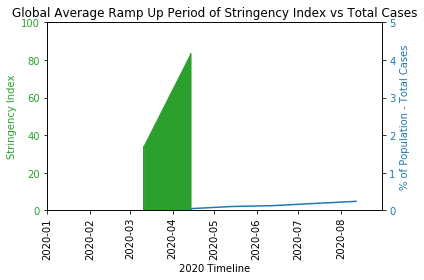

In [39]:
# Create comparison plot - Global Average Ramp Up
fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('2020 Timeline')
ax1.set_ylabel('Stringency Index', color=color)
ax1.bar(x_axis_as, y_axis_as, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.fill_between(x_axis_as,y_axis_as,color=color)
plt.xlim(start,end)
plt.ylim(0,100)
plt.xticks(rotation = 90)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('% of Population - Total Cases', color=color)  # we already handled the x-label with ax1
ax2.plot(x_axis_ac, y_axis_ac, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.ylim(0,5)

plt.title("Global Average Ramp Up Period of Stringency Index vs Total Cases")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

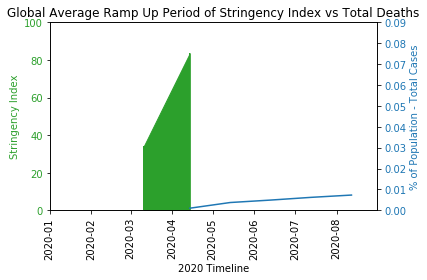

In [40]:
# Create comparison plot - Global Average Ramp Up
fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('2020 Timeline')
ax1.set_ylabel('Stringency Index', color=color)
ax1.bar(x_axis_as, y_axis_as, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.fill_between(x_axis_as,y_axis_as,color=color)
plt.xlim(start,end)
plt.ylim(0,100)
plt.xticks(rotation = 90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('% of Population - Total Cases', color=color)  # we already handled the x-label with ax1
ax2.plot(x_axis_ac, y_axis_ad, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.ylim(0,0.09)

plt.title("Global Average Ramp Up Period of Stringency Index vs Total Deaths")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Specific Country Analysis

In [41]:
countries = list(merged_covid_df['location'].unique())
print(countries)

['Aruba', 'Afghanistan', 'Angola', 'Albania', 'United Arab Emirates', 'Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana', 'Central African Republic', 'Canada', 'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Democratic Republic of Congo', 'Congo', 'Colombia', 'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia', 'Greece', 'Guatemala', 'Guam', 'Guyana', 'Hong Kong', 'Honduras', 'Croatia', 'Haiti', 'Hungary', 'Indonesia', 'India', 'Ireland', 'Iran', 'Iraq', 'Iceland', 'Israel', 'Italy', 'Jamaica', 'Jordan', 'Japan', 'Kazakhstan', 'Kenya', 'Kyrgyzstan

In [42]:
country_filter = (input("What country do you want to analyze?"))

What country do you want to analyze?Moldova


In [43]:
country = ramp_up_details.loc[ramp_up_details.index == country_filter].copy()

In [44]:
country

,min_stringency,max_stringency,ramp_start,ramp_end,ramp_length,population,total_tests_beg,percent_pop_tests_beg,total_cases_beg,percent_pop_cases_beg,...,one_twenty_days,total_tests_120,percent_pop_tests_120,120_Days_Percentage_Change_Tests,total_cases_120,percent_pop_cases_120,120_Days_Percentage_Change_Cases,total_deaths_120,percent_pop_deaths_120,120_Days_Percentage_Change_Deaths
country,,,,,,,,,,,,,,,,,,,,,
Moldova,51.85,87.04,2020-03-11,2020-03-24,13 days,4033963.0,0.0,0.0,3.0,0.000074,...,2020-07-22 00:00:00,0.0,0.0,0.0,21442.0,0.531537,714633.333333,707.0,0.017526,0.0


In [45]:
# Create lists - ramp up and total cases
ramp_beg = country['ramp_start'].to_list()
ramp_end = country['ramp_end'].to_list()

ramp_length = country['ramp_length'][0].days

stringency_min = country['min_stringency'].to_list()
stringency_max = country['max_stringency'].to_list()

ramp_end_cases = country['percent_pop_cases_end'].to_list()
thirty_cases = country['percent_pop_cases_30'].to_list()
sixty_cases = country['percent_pop_cases_60'].to_list()
ninety_cases = country['percent_pop_cases_90'].to_list()
one_twenty_cases = country['percent_pop_cases_120'].to_list()

ramp_end_deaths = country['percent_pop_deaths_end'].to_list()
thirty_deaths = country['percent_pop_deaths_30'].to_list()
sixty_deaths = country['percent_pop_deaths_60'].to_list()
ninety_deaths = country['percent_pop_deaths_90'].to_list()
one_twenty_deaths = country['percent_pop_deaths_120'].to_list()

ramp_end_date = country['ramp_end'].to_list()
thirty_date = country['thirty_days'].to_list()
sixty_date = country['sixty_days'].to_list()
ninety_date = country['ninety_days'].to_list()
one_twenty_date = country['one_twenty_days'].to_list()

start = merged_covid_df.date_updated.min()
start = pd.to_datetime(start)
end = merged_covid_df.date_updated.max()
end = pd.to_datetime(end)

In [46]:
# Set the x and y axis for ramp up and for total cases
x_axis = ramp_beg + ramp_end
x_axis = pd.to_datetime(x_axis)
y_axis = stringency_min + stringency_max

x_axis1 = ramp_end_date + thirty_date + sixty_date + ninety_date + one_twenty_date
x_axis1 = pd.to_datetime(x_axis1)

y_axis1 = ramp_end_cases + thirty_cases + sixty_cases + ninety_cases + one_twenty_cases
y_axis2 = ramp_end_deaths + thirty_deaths + sixty_deaths + ninety_deaths + one_twenty_deaths

In [47]:
# To detemine adjusted x_axis for calculation of slope and y axis limit 
print(merged_covid_df['percentage_of_Pop_Total_Cases'].max())

# Max amount is 4.11, therefore 5 will be maximum x_axis value
x_axis0 = [1,2,3,4,5]

# X_axis based on average length 
x_axis_stringency = [0,ramp_length]

4.115672703796519


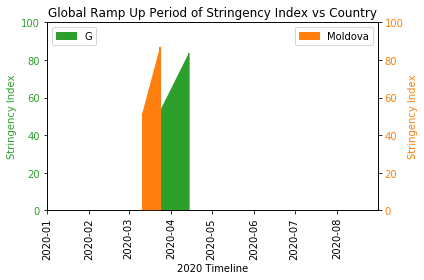

In [48]:
# Create comparison plot - Global Average Ramp Up vs Country Ramp Up
fig, ax1 = plt.subplots()
color = 'tab:green'
ax1.set_xlabel('2020 Timeline')
ax1.set_ylabel('Stringency Index', color=color)
ax1.bar(x_axis_as, y_axis_as, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.fill_between(x_axis_as,y_axis_as,color=color)
plt.xlim(start,end)
plt.ylim(0,100)
plt.xticks(rotation = 90)
plt.legend("G",loc=2)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_xlabel('2020 Timeline')
ax2.set_ylabel('Stringency Index', color=color)
ax2.bar(x_axis, y_axis, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.fill_between(x_axis,y_axis,color=color)
plt.ylim(0,100)
plt.legend(country.index,loc=1)

plt.title("Global Ramp Up Period of Stringency Index vs Country")


plt.xlim(start,end)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

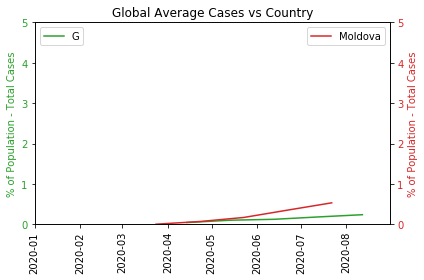

In [49]:
# Create comparison plot - Global Average Cases vs Country
fig, ax1 = plt.subplots()
color = 'tab:green'
ax1.set_ylabel('% of Population - Total Cases', color=color)  # we already handled the x-label with ax1
ax1.plot(x_axis_ac, y_axis_ac, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.ylim(0,5)
plt.xlim(start,end)
plt.xticks(rotation = 90)
plt.legend("G",loc=2)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('% of Population - Total Cases', color=color)  # we already handled the x-label with ax1
ax2.plot(x_axis1, y_axis1, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.ylim(0,5)
plt.legend(country.index,loc=1)

plt.title("Global Average Cases vs Country")

plt.xlim(start,end)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

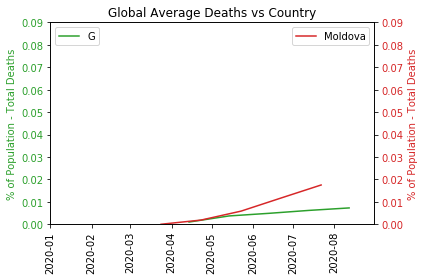

In [50]:
# Create comparison plot - Global Average Deaths vs Country
fig, ax1 = plt.subplots()
color = 'tab:green'
ax1.set_ylabel('% of Population - Total Deaths', color=color)  
ax1.plot(x_axis_ac, y_axis_ad, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.ylim(0,0.09)
plt.xlim(start,end)
plt.xticks(rotation = 90)
plt.legend("G",loc=2)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('% of Population - Total Deaths', color=color)  
ax2.plot(x_axis1, y_axis2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.ylim(0,0.09)

plt.title("Global Average Deaths vs Country")
plt.legend(country.index,loc=1)

plt.xlim(start,end)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

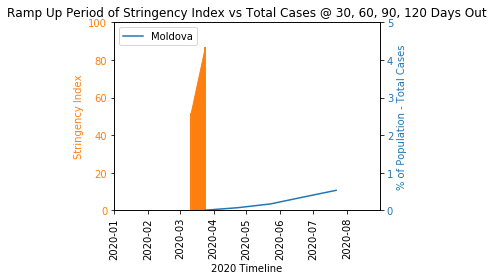

In [51]:
# Create comparison plot - Ramp Up vs Future Total % of Population - Cases
fig, ax1 = plt.subplots()

color = 'tab:orange'
ax1.set_xlabel('2020 Timeline')
ax1.set_ylabel('Stringency Index', color=color)
ax1.bar(x_axis, y_axis, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.fill_between(x_axis,y_axis,color=color)
plt.ylim(0,100)
plt.xticks(rotation = 90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('% of Population - Total Cases', color=color)  
ax2.plot(x_axis1, y_axis1, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.ylim(0,5)

plt.title("Ramp Up Period of Stringency Index vs Total Cases @ 30, 60, 90, 120 Days Out")
plt.legend(country.index, loc=2)

plt.xlim(start,end)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [52]:
# Slope of Line - stringency
a = x_axis_stringency
b = y_axis
slope_stringency = linregress(a,b).slope

In [53]:
slope_stringency

2.706923076923077

In [54]:
# Slope of Line - % of pop total cases
a = x_axis0
b = y_axis1
slope_cases = linregress(a,b).slope

In [55]:
slope_cases

0.1340815471039273

In [56]:
# To detemine adjusted x_axis for calculation of slope and y axis limit 
print(merged_covid_df['percentage_of_Pop_Total_Deaths'].max())

# Max amount is 4.11, therefore 5 will be maximum x_axis value
x_axis00 = [0.01,0.03,0.05,0.07,0.09]

0.0873108530229093


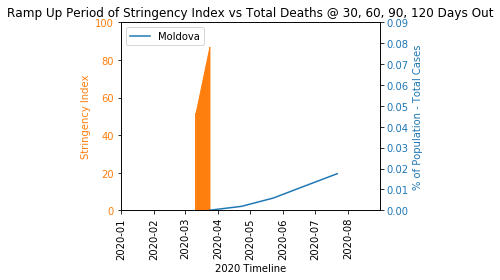

In [57]:
# Create comparison plot - Ramp Up vs Future Total % of Population - Deaths
fig, ax1 = plt.subplots()

color = 'tab:orange'
ax1.set_xlabel('2020 Timeline')
ax1.set_ylabel('Stringency Index', color=color)
ax1.bar(x_axis, y_axis, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.fill_between(x_axis,y_axis,color=color)
plt.ylim(0,100)
plt.xticks(rotation = 90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('% of Population - Total Cases', color=color)  
ax2.plot(x_axis1, y_axis2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.ylim(0,0.09)

plt.title("Ramp Up Period of Stringency Index vs Total Deaths @ 30, 60, 90, 120 Days Out")
plt.legend(country.index, loc=2)

plt.xlim(start,end)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [58]:
# Slope of Line - % of pop total deaths
a = x_axis00
b = y_axis2
slope_deaths = linregress(a,b).slope

In [59]:
slope_deaths

0.22422119389791131

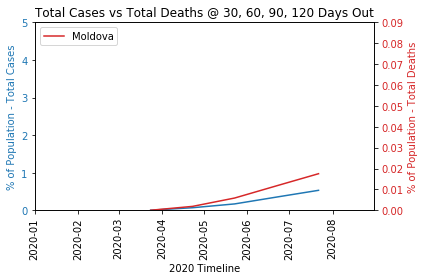

In [60]:
# Create comparison plot - Ramp Up vs Future Total % of Population - Deaths
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('2020 Timeline')
ax1.set_ylabel('% of Population - Total Cases', color=color)
ax1.plot(x_axis1, y_axis1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.ylim(0,5)
plt.xticks(rotation = 90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('% of Population - Total Deaths', color=color)  
ax2.plot(x_axis1, y_axis2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.ylim(0,0.09)

plt.title("Total Cases vs Total Deaths @ 30, 60, 90, 120 Days Out")
plt.legend(country.index, loc=2)

plt.xlim(start,end)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()